# README
* Extract the Broadatz dataset and specify the path to  Brodatz dataset folder in second cell of data exploration here : https://colab.research.google.com/drive/1kIwMxyjJT4r8M3EHazbpKw6NujjBFo06#scrollTo=CRO3Q-jFoYY5&line=9&uniqifier=1.
* Upload the `base_matrix.npy` sensing matrix on the drive and specify its path in the Delsarte-Goethal matrix case here: https://colab.research.google.com/drive/1kIwMxyjJT4r8M3EHazbpKw6NujjBFo06#scrollTo=KYshOPRmQU3y&line=1&uniqifier=1.
* Extract the CIFAR -10  data set from `cifar-10.gz` and specify the path to the CIFAR-10 pickle data batch here: https://colab.research.google.com/drive/1kIwMxyjJT4r8M3EHazbpKw6NujjBFo06#scrollTo=e17KVkURxefI&line=1&uniqifier=1



# Data Exploration

In [5]:
import numpy as np
import scipy.signal as sig
import pywt
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [6]:
# Loading the original broadatz data 
# Spefict the path for the extracted Original Broadatz dataset
path_list = sorted(glob.glob("/content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/*"), key= lambda x : int(x.split(".gif")[0].split("/D")[1]))
path = path_list[0]
im = Image.open(path)

# To iterate through the entire gif
try:
    while 1:
        im.seek(im.tell()+1)
        # do something to im
except EOFError:
    pass # end of sequence

widths = np.arange(1,639)

num_im = np.asarray(im, dtype='int64')
print(np.shape(num_im))

(640, 640)


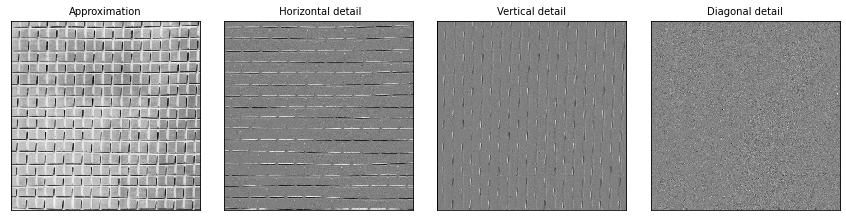

In [7]:
# Exploring a test image through wavelet decomposition
coeffs2 = pywt.dwt2(num_im, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [8]:
# Collecting files for K-means clustering of the data
import glob
# path_list = sorted(glob.glob("/content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/*"), key= lambda x : int(x.split(".gif")[0].split("/D")[1]))

original = []
approximation = []
horizontal = []
vertical = []
diagonal = []

for i in range(len(path_list)):
  print("collecting for file : ", path_list[i])
  im = Image.open(path_list[i])
  # To iterate through the entire gif
  try:
      while 1:
          im.seek(im.tell()+1)
          # do something to im
  except EOFError:
      pass # end of sequence

  widths = np.arange(1,639)

  num_im = np.asarray(im, dtype='int64')
  original.append(num_im)
  coeffs2 = pywt.dwt2(num_im, 'bior1.3')
  LL, (LH, HL, HH) = coeffs2
  approximation.append(LL)
  horizontal.append(LH)
  vertical.append(HL)
  diagonal.append(HH)



collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D1.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D2.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D3.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D4.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D5.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D6.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz/D7.gif
collecting for file :  /content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/Original Brodatz

In [9]:
# Reshaping the orignal data images into vectors
original_res = np.reshape(original, (112, 640*640))

In [10]:
# Applying K-means clustering on the data and using the center indices as mean vectors
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(original_res)

output = kmeans.predict(original_res)

centers = kmeans.cluster_centers_
np.shape(centers)

(3, 409600)

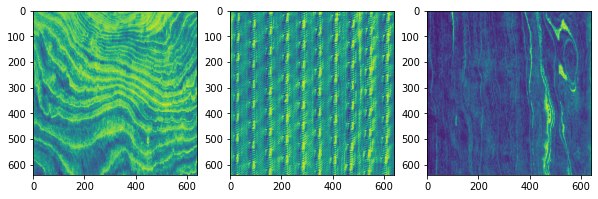

In [11]:
# Finding and displaying the datapoint/image closest to the mean for each of the classes
im_c1 = np.reshape(centers[0], (640,640))
im_c2 = np.reshape(centers[1], (640,640))
im_c3 = np.reshape(centers[2], (640,640))

map_1 = list(map(lambda x : np.linalg.norm(x - centers[0]), original_res))
map_2 = list(map(lambda x : np.linalg.norm(x - centers[1]), original_res))
map_3 = list(map(lambda x : np.linalg.norm(x - centers[2]), original_res))

plt.figure(figsize = (10,6))
plt.subplot(1,3,1)
plt.imshow(original[np.argmin(map_3)])
plt.subplot(1,3,2)
plt.imshow(original[np.argmin(map_2)])
plt.subplot(1,3,3)
plt.imshow(original[np.argmin(map_1)])

# Working with Broadatz labelled dataset



*   Initially we had an unlabelled dataset of Broadatz texture features
*   We have labelled them in order to get a labelled dataset.
*   Further compressive classification will be done on this dataset, also the efficiency of the classfication method will be evaluated on this 



In [12]:
# Importing the libraries

import os
import glob
import numpy as np
import scipy.signal as sig
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
# Path to the custom labelled Broadatz dataset
path = "/content/drive/Shareddrives/Advanced Image Processing/dataset/Original_Brodatz/labelled"

In [14]:
# Loading the data, downsampling it by 2 for computational purposes into a dictionary with three different labels
data = {}
for i in range(len(os.listdir(path))):
  print(" Collecting images for : ", os.path.join(path,os.listdir(path)[i]) + '/*')
  files = glob.glob(os.path.join(path,os.listdir(path)[i]) + '/*')
  arr = [];
  for j in range(len(files)):
    im = Image.open(files[j])
    # To iterate through the entire gif
    try:
        while 1:
            im.seek(im.tell()+1)
            # do something to im
    except EOFError:
        pass # end of sequence

    widths = np.arange(1,639)

    num_im = np.asarray(im, dtype='int64')
    arr.append(num_im[0::2,0::2])
  data[os.listdir(path)[i]] = arr
    

## a) Sensing Matrix : Bernoulli 

### Getting Compressive Measurements

In [15]:
# Funcations required for obtaining the compressive measurements
from scipy.fft import dct, idct

def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho')

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def get_compressive_measurements(data, sensing_matrix, show_random_samples = False):
  # Obtaining the sensed output
  m = np.shape(sensing_matrix)[0]
  coded_data = {}
  for i in range(len(data.keys())):
    keys = list(data.keys())
    images = data[keys[i]]
    coded_arr = []
    for image in images:
      coded_image = np.matmul(sensing_matrix,np.reshape(dct2(image), (image.size, 1)))
      coded_arr.append(coded_image)
    coded_data[list(data.keys())[i]] = coded_arr

  # Displaying some 5 random images
  if show_random_samples == True:
    for i in range(5):
      idx = np.random.randint(0,3)
      class_im = coded_data[list(coded_data.keys())[idx]]
      idx2 = np.random.randint(0,len(class_im))
      coded_image = class_im[idx2]
      original_image = data[list(coded_data.keys())[idx]][idx2]
      plt.subplot(1,2,1)
      plt.imshow(original_image, cmap='gray')
      plt.title("Original Image")
      plt.subplot(1,2,2)
      plt.imshow(np.reshape(coded_image,(int(np.sqrt(m)),int(np.sqrt(m)))), cmap='gray')
      plt.title("Sensed Image")
      plt.show()

  # generating a random dataset using the orignal data and labels
  labels = []
  c_data = []
  o_data = []
  for i in range(112):
    idx = np.random.randint(0,3)
    class_im = coded_data[list(coded_data.keys())[idx]]
    class_org = data[list(data.keys())[idx]]
    labels.append(idx)
    idx2 = np.random.randint(0,len(class_im))
    coded_image = class_im[idx2]
    c_data.append(coded_image)
    o_data.append(class_org[idx2])


  return c_data, labels, o_data

In [16]:
# Creating the Bernoulli Matrix
sensing_matrix = np.random.binomial(n= 1, p = 0.5, size = (256, 320*320))
sensing_matrix = np.where(sensing_matrix == 0, -1/np.sqrt(256), 1/np.sqrt(256))

The cell below shows the compressed data adjacent to the original data, this is just for visual purposes to show how the data is in the compressed domain.

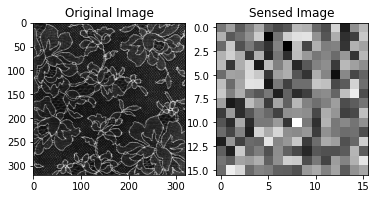

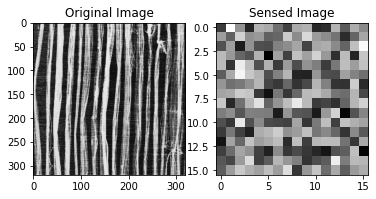

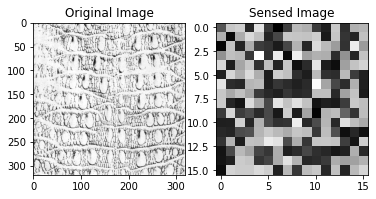

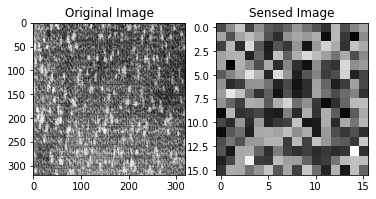

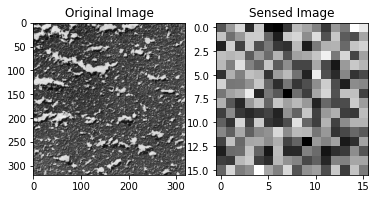

In [17]:
# Using the Bernolli matrix to obtain the compressed data, the labels and the original data, samples randomly picked into the datset
c_data, labels, o_data = get_compressive_measurements(data, sensing_matrix, True)

In [18]:
# dividing the compressed data and the original data into test and training sets
cx_train,cy_train = c_data[0:56],labels[0:56]
cx_test,cy_test = c_data[56:],labels[56:]
ox_train, oy_train = o_data[0:56],labels[0:56]
ox_test, oy_test = o_data[56:], labels[56:]

### SVM Classification 

In [19]:
# Performing SVM Classification

# Parameters of SVM
# - Kernel : rbf
# - Degree of Polynomial : 3

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification on the compressed data
classifier_coded = svm.SVC()
classifier_coded.fit(np.reshape(cx_train,(56,256)),cy_train)

# Classification on the Original data
classifier_data = svm.SVC()
classifier_data.fit(np.reshape(ox_train,(56,320*320)),oy_train)

# Obtaining the compressed and the original predictions, and printing the accuracy
y_pred_coded = classifier_coded.predict(np.reshape(cx_test, (56, 256)))
y_pred_original = classifier_data.predict(np.reshape(ox_test, (56, 320*320)))

print("Classification Accuracy on sensed data for m = 256: ",accuracy_score(cy_test, y_pred_coded)) # With size 640*640 = 0.303
print("Classification Accuracy on actual data: ",accuracy_score(oy_test, y_pred_original)) # With size 640*640 = 0.4285

Classification Accuracy on sensed data for m = 256:  0.3392857142857143
Classification Accuracy on actual data:  0.7678571428571429


In [20]:
# Getting the plot for classification accuracy for different values of m
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Getting the accuracies for different compression ratios
m = [200, 400, 600, 800, 1000, 1200]
acc_arr = []

# Obtaining the uncompressed data to be repeatedly used for classification
sensing_matrix = np.random.binomial(n= 1, p = 0.5, size = (200, 320*320))
sensing_matrix = np.where(sensing_matrix == 0, -1/np.sqrt(200), 1/np.sqrt(200))
_,o_labels,o_data = get_compressive_measurements(data, sensing_matrix)
for i in m:
  # Sensing matrix for different values of m
  sensing_matrix = np.random.binomial(n= 1, p = 0.5, size = (i, 320*320))
  sensing_matrix = np.where(sensing_matrix == 0, -1/np.sqrt(i), 1/np.sqrt(i))

  # Compressed data for different values of m
  c_data, c_labels,_ = get_compressive_measurements(data, sensing_matrix)

  # Dividing the dataset into test and train
  cx_train,cy_train = c_data[0:56],c_labels[0:56]
  cx_test,cy_test = c_data[56:],c_labels[56:]
  ox_train, oy_train = o_data[0:56],o_labels[0:56]
  ox_test, oy_test = o_data[56:], o_labels[56:]

  # SVM classifier on compressed data
  classifier_coded = svm.SVC()
  classifier_coded.fit(np.reshape(cx_train,(56,i)),cy_train)

  # SVM classifier on original data
  classifier_data = svm.SVC()
  classifier_data.fit(np.reshape(ox_train,(56,320*320)),oy_train)

  # Predictions on the compressed as well as the original data
  y_pred_coded = classifier_coded.predict(np.reshape(cx_test, (56, i)))
  y_pred_original = classifier_data.predict(np.reshape(ox_test, (56, 320*320)))

  # Accuracies on the compressed and original data
  acc_sensed = accuracy_score(cy_test, y_pred_coded)
  acc_actual = accuracy_score(oy_test, y_pred_original)
  print("Classification Accuracy on sensed data for m = ", i, " : ", acc_sensed)
  print("Classification Accuracy on original data", acc_actual)
  print("-----------------------------------------------------------------------------------------------------")

  acc_arr.append(acc_sensed)


## Since we observe this trend we can say that the sensing matrix obtained from the bernoulli sensing matrix is not distance preserving 

Classification Accuracy on sensed data for m =  200  :  0.48214285714285715
Classification Accuracy on original data 0.5892857142857143
-----------------------------------------------------------------------------------------------------
Classification Accuracy on sensed data for m =  400  :  0.32142857142857145
Classification Accuracy on original data 0.5892857142857143
-----------------------------------------------------------------------------------------------------
Classification Accuracy on sensed data for m =  600  :  0.44642857142857145
Classification Accuracy on original data 0.5892857142857143
-----------------------------------------------------------------------------------------------------
Classification Accuracy on sensed data for m =  800  :  0.5892857142857143
Classification Accuracy on original data 0.5892857142857143
-----------------------------------------------------------------------------------------------------
Classification Accuracy on sensed data for m =  1

<function matplotlib.pyplot.show>

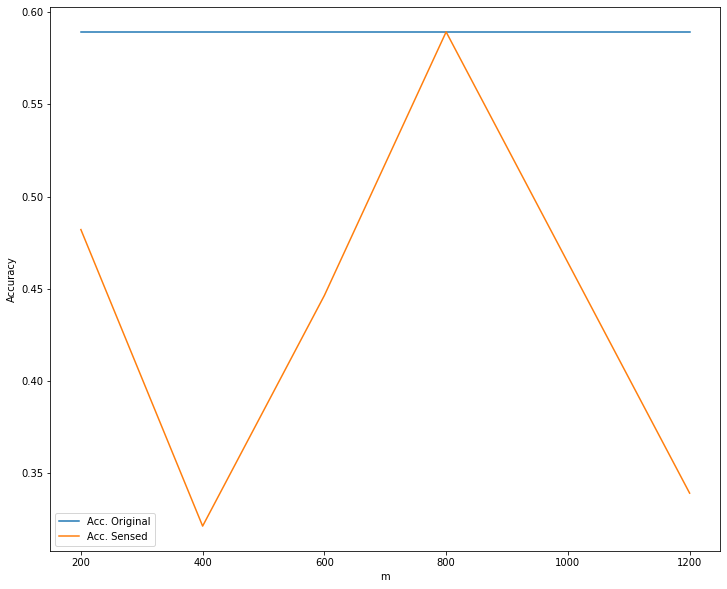

In [21]:
# Trend of accuracies using SVM classifier.
plt.figure(figsize = (12,10))
plt.plot(m,len(m)*[acc_actual], label = "Acc. Original")
plt.plot(m,acc_arr, label = "Acc. Sensed")
plt.ylabel('Accuracy')
plt.xlabel('m')
plt.legend()
plt.show

As we can see from the above results that a simple bernoulli matrix based coding is not doing a very good job in classification.

###  ANN Classification

In [22]:
# Obtaining the sensing matrix
sensing_matrix = np.random.binomial(n= 1, p = 0.5, size = (256, 320*320))
sensing_matrix = np.where(sensing_matrix == 0, -1/np.sqrt(256), 1/np.sqrt(256))

c_data, c_labels,_ = get_compressive_measurements(data, sensing_matrix)

cx_train,cy_train = c_data[0:56],c_labels[0:56]
cx_test,cy_test = c_data[56:],c_labels[56:]
ox_train, oy_train = o_data[0:56],o_labels[0:56]
ox_test, oy_test = o_data[56:], o_labels[56:]

In [23]:
import tensorflow as tf

tf.keras.backend.clear_session()

#### Classification on Original Data

In [24]:
# Creating the neural network
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(64,activation='relu',input_shape = (320*320,)))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(64,activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(32,activation='relu'))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(3, activation = 'relu'))

In [25]:
# Early stopping for optimal learning
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

# Compiling ANN model
ann_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# Model Summary
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6553664   
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [27]:
# Training the model for 15 epochs
epochs = 15
history_original = ann_model.fit(
  np.array(np.reshape(ox_train, (56, 320*320))),np.array(oy_train),
  epochs=epochs,
  callbacks = callback
)

Epoch 1/15
2/2 [==============================] - 1s 71ms/step - loss: 1.1834 - accuracy: 0.3750
Epoch 2/15
2/2 [==============================] - 0s 53ms/step - loss: 1.1050 - accuracy: 0.3929
Epoch 3/15
2/2 [==============================] - 0s 65ms/step - loss: 1.0386 - accuracy: 0.5179
Epoch 4/15
2/2 [==============================] - 0s 55ms/step - loss: 0.9582 - accuracy: 0.5179
Epoch 5/15
2/2 [==============================] - 0s 55ms/step - loss: 0.9098 - accuracy: 0.5536
Epoch 6/15
2/2 [==============================] - 0s 47ms/step - loss: 0.9255 - accuracy: 0.6250
Epoch 7/15
2/2 [==============================] - 0s 65ms/step - loss: 0.8895 - accuracy: 0.6071
Epoch 8/15
2/2 [==============================] - 0s 54ms/step - loss: 0.8433 - accuracy: 0.6429
Epoch 9/15
2/2 [==============================] - 0s 57ms/step - loss: 0.8156 - accuracy: 0.6964
Epoch 10/15
2/2 [==============================] - 0s 53ms/step - loss: 0.7429 - accuracy: 0.7500
Epoch 11/15
2/2 [============

In [28]:
# Evaluating the model for on the test datset
ann_model.evaluate(np.array(np.reshape(ox_test, (56, 320*320))), np.array(oy_test))


2/2 [==============================] - 0s 17ms/step - loss: 1.3655 - accuracy: 0.3929


[1.365477204322815, 0.3928571343421936]

#### Classification on Sensed Data

In [29]:
 # Model for sensed data
tf.keras.backend.clear_session()

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(64,activation='relu',input_shape = (256,)))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(64,activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(32,activation='relu'))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(3, activation = 'relu'))


In [30]:
# Early stopping 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

# Model Compilation
ann_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
# Training for 15 epochs
epochs = 15
history_sensed = ann_model.fit(
  np.array(cx_train),np.array(cy_train),
  epochs=epochs,
  callbacks = callback
)

Epoch 1/15
2/2 [==============================] - 1s 20ms/step - loss: 1.3230 - accuracy: 0.2500
Epoch 2/15
2/2 [==============================] - 0s 9ms/step - loss: 1.2023 - accuracy: 0.3750
Epoch 3/15
2/2 [==============================] - 0s 9ms/step - loss: 1.0704 - accuracy: 0.4286
Epoch 4/15
2/2 [==============================] - 0s 8ms/step - loss: 1.0649 - accuracy: 0.4821
Epoch 5/15
2/2 [==============================] - 0s 9ms/step - loss: 1.0329 - accuracy: 0.5893
Epoch 6/15
2/2 [==============================] - 0s 12ms/step - loss: 0.9453 - accuracy: 0.5714
Epoch 7/15
2/2 [==============================] - 0s 11ms/step - loss: 0.8594 - accuracy: 0.6429
Epoch 8/15
2/2 [==============================] - 0s 9ms/step - loss: 0.8216 - accuracy: 0.6786
Epoch 9/15
2/2 [==============================] - 0s 7ms/step - loss: 0.8404 - accuracy: 0.6786
Epoch 10/15
2/2 [==============================] - 0s 9ms/step - loss: 0.7599 - accuracy: 0.6964
Epoch 11/15
2/2 [===================

In [32]:
# Evaluating the model on the test set
ann_model.evaluate(np.array(cx_test), np.array(cy_test))

2/2 [==============================] - 0s 7ms/step - loss: 1.7885 - accuracy: 0.3214


[1.7884979248046875, 0.3214285671710968]

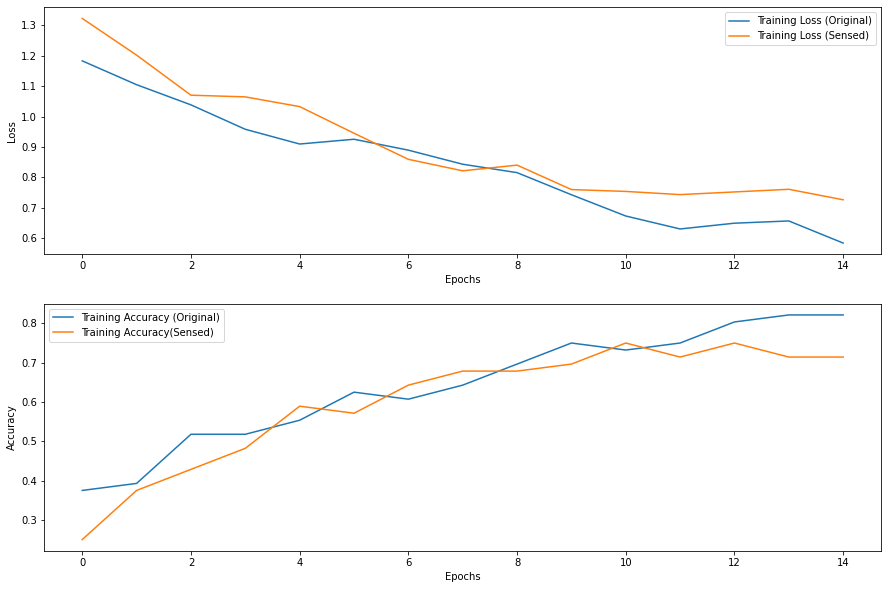

In [33]:
# Plot of training loss and accuracy over the sensed data and the original data
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(history_original.history['loss'], label = "Training Loss (Original)")
plt.plot(history_sensed.history['loss'], label = "Training Loss (Sensed)")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(2,1,2)
plt.plot(history_original.history['accuracy'], label = "Training Accuracy (Original)")
plt.plot(history_sensed.history['accuracy'], label = "Training Accuracy(Sensed)")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

## b) Sensing Matrix : Delsarte-Geothal Frames

In [34]:
import numpy as np
# Creating a Delsarte-Goethal Frame

def DGMatrix(order):
  o = order
  m = 2**o
  n = 2**(2*o)
  arr = np.zeros((m,n))
  for i in range(m):
    form = '{0:0' + str(o) + 'b}'
    t = form.format(i)
    t = np.asarray([int(i) for i in t])
    for j in range(n):
      A = np.random.randint(0,2,size = (o,o))
      P =  np.triu(A) - np.diag(np.diag(A)) + np.transpose(np.triu(A))
      b = np.random.randint(0,2, size = o)
      iota = complex(0,1)
      alpha = (np.linalg.norm(np.reshape(P,P.size), ord = 0) + 2*np.linalg.norm(b, ord = 0))%4
      beta = (np.matmul(np.matmul(t,P),np.transpose(t)) + 2*np.matmul(b,np.transpose(t)))%4
      # beta2 = 2*np.matmul(b,np.transpose(t))%4
      a = (iota**(alpha))*(iota**(beta))
      arr[i,j] = int(a.real)
      if int(a.real) == 0:
        arr[i,j] = 1

  return arr

In [35]:
## WARNING : Time Intensive Execution
# sensing_matrix = DGMatrix(8)

In [36]:
# loading the saved DG matrix
sensing_mat = np.load('/content/drive/Shareddrives/Advanced Image Processing/base_matrix.npy') # Set the path for the base matrix appropriately

In [37]:
# Creating the DG sensing matrix through random horizontal flipping
sensing_matrix = sensing_mat
for i in range((102400//65536)):
  sensing_matrix = np.hstack((sensing_matrix, np.flip(sensing_matrix, axis = np.random.randint(0,2))))

In [38]:
# Creating the DG sensing matrix
sensing_matrix = sensing_matrix[:,:102400]

#### Getting compressive measurements 

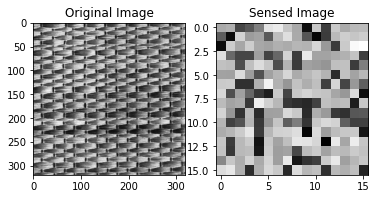

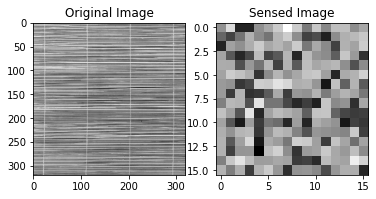

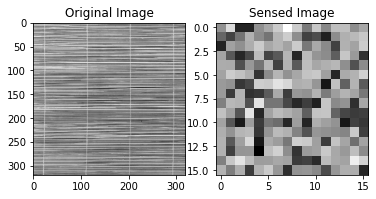

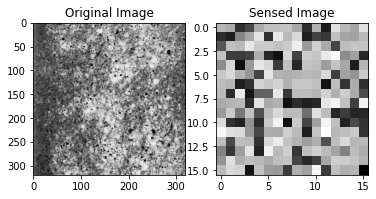

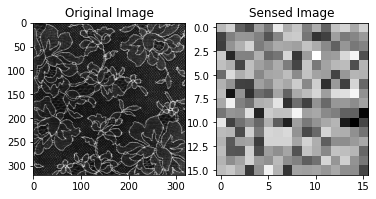

In [39]:
c_data, labels, o_data = get_compressive_measurements(data, sensing_matrix, True)

In [40]:
# Creating the dataset from the compressed and original data
cx_train,cy_train = c_data[0:56],labels[0:56]
cx_test,cy_test = c_data[56:],labels[56:]
ox_train, oy_train = o_data[0:56],labels[0:56]
ox_test, oy_test = o_data[56:], labels[56:]

#### SVM Classification

In [41]:
# SVM Classifier on Compressed data
from sklearn import svm
classifier_coded = svm.SVC()
classifier_coded.fit(np.reshape(cx_train,(56,256)),cy_train)

SVC()

In [42]:
# SVM classifier on original data
classifier_data = svm.SVC()
classifier_data.fit(np.reshape(ox_train,(56,320*320)),oy_train)

SVC()

In [43]:
# SVM Accuracy on Compressed and Original data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_coded = classifier_coded.predict(np.reshape(cx_test, (56, 256)))
y_pred_original = classifier_data.predict(np.reshape(ox_test, (56, 320*320)))

print("Accuracy on sensed data: ",accuracy_score(cy_test, y_pred_coded))
print("Accuracy on actual data: ",accuracy_score(oy_test, y_pred_original))

Accuracy on sensed data:  0.6071428571428571
Accuracy on actual data:  0.6785714285714286


###  ANN Classification

In [44]:
import tensorflow as tf

tf.keras.backend.clear_session()

#### Classification on Original Data 

Done in the Bernoulli matrix section, we'll reuse the results from there

#### Classification on Sensed Data

In [45]:
# ANN Model architecture
tf.keras.backend.clear_session()

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(64,activation='relu',input_shape = (256,)))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(64,activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(32,activation='relu'))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(3, activation = 'relu'))


In [46]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

ann_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# Training for 15 epochs
epochs = 15
history_sensed = ann_model.fit(
  np.array(c_data),np.array(c_labels),
  validation_split = 0.5,
  epochs=epochs,
  callbacks = callback
)

Epoch 1/15
2/2 [==============================] - 1s 211ms/step - loss: 1.1187 - accuracy: 0.2679 - val_loss: 6.8519 - val_accuracy: 0.3036
Epoch 2/15
2/2 [==============================] - 0s 30ms/step - loss: 1.1048 - accuracy: 0.3929 - val_loss: 7.0266 - val_accuracy: 0.3214
Epoch 3/15
2/2 [==============================] - 0s 31ms/step - loss: 1.0648 - accuracy: 0.4107 - val_loss: 6.7921 - val_accuracy: 0.2857
Epoch 4/15
2/2 [==============================] - 0s 30ms/step - loss: 1.0148 - accuracy: 0.4643 - val_loss: 7.5088 - val_accuracy: 0.2321
Epoch 5/15
2/2 [==============================] - 0s 29ms/step - loss: 1.0598 - accuracy: 0.4107 - val_loss: 8.1891 - val_accuracy: 0.2143
Epoch 6/15
2/2 [==============================] - 0s 33ms/step - loss: 0.9265 - accuracy: 0.4643 - val_loss: 7.9109 - val_accuracy: 0.2321
Epoch 7/15
2/2 [==============================] - 0s 32ms/step - loss: 0.9121 - accuracy: 0.5357 - val_loss: 7.6556 - val_accuracy: 0.2321
Epoch 8/15
2/2 [==========

In [48]:
# Evaluating on the test datset
ann_model.evaluate(np.array(cx_test), np.array(cy_test))

2/2 [==============================] - 0s 4ms/step - loss: 3.2069 - accuracy: 0.2679


[3.2068896293640137, 0.2678571343421936]

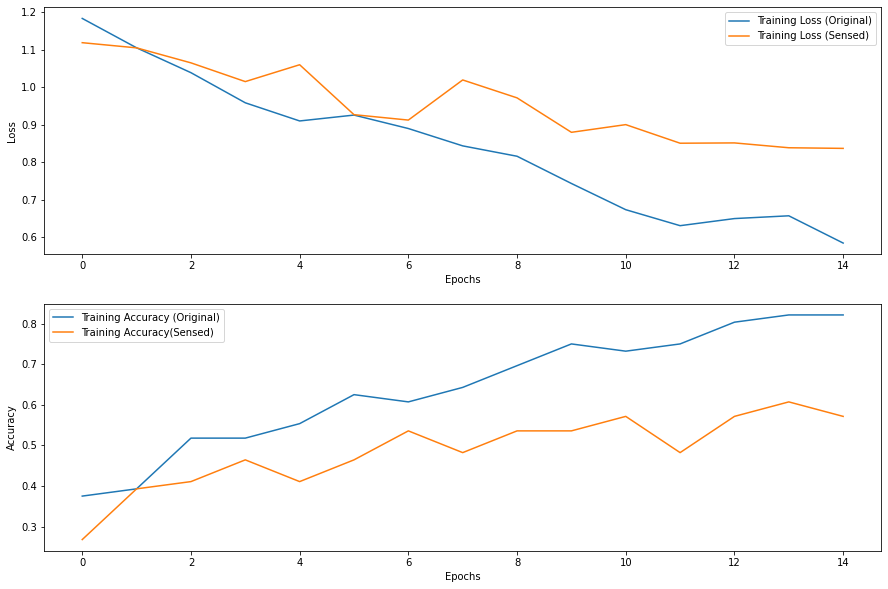

In [49]:
# Plot of training accuract and test accuracy on the compressed and original data
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(history_original.history['loss'], label = "Training Loss (Original)")
plt.plot(history_sensed.history['loss'], label = "Training Loss (Sensed)")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(2,1,2)
plt.plot(history_original.history['accuracy'], label = "Training Accuracy (Original)")
plt.plot(history_sensed.history['accuracy'], label = "Training Accuracy(Sensed)")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

# Working with CIFAR -10

In [50]:
# Loading the libraries
import os
import glob
import numpy as np
import scipy.signal as sig
import pywt
# from pywt import 
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [51]:
# Defining functions for data extraction
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def get_image(row):
  arr = np.zeros(shape=(32,32,3))
  arr[:,:,0] = np.reshape(row[0:1024], (32,32))
  arr[:,:,1] = np.reshape(row[1024:2048], (32,32))
  arr[:,:,2] = np.reshape(row[2048:3072], (32,32))

  return arr

In [52]:
# Extracting the datas into a dictionary
dictionary = unpickle("/content/drive/Shareddrives/Advanced Image Processing/dataset/cifar-10-batches-py/data_batch_1")

In [53]:
# Obtaining the images from the dictionary data and converting them to graysclae for classification
data = list(map(lambda x: cv2.cvtColor(np.uint8(get_image(x)), cv2.COLOR_BGR2GRAY), dictionary[b'data']))
labels = dictionary[b'labels']

## a) Sensing Matrix : Bernoulli Random

### Getting Compressive Measurements

In [54]:
# Random Bernoulli matrix
sensing_matrix = np.random.binomial(n= 1, p = 0.5, size = (32, 32*32))
sensing_matrix = np.where(sensing_matrix == 0, -1/np.sqrt(32), 1/np.sqrt(32))

In [55]:
# Getting the compressed data using the sensing matri
c_data = list(map(lambda x: sensing_matrix @ np.reshape(dct2(x),(32*32,1)), data))

In [56]:
# Getting the training and testing data from the compressed data and the labels
cx_train,cy_train = c_data[0:9000],labels[0:9000]
cx_test,cy_test = c_data[9000:],labels[9000:]
ox_train, oy_train = data[0:9000],labels[0:9000]
ox_test, oy_test = data[9000:], labels[9000:]

### SVM Classification

In [57]:
# SVM classifier on compressed data
from sklearn import svm
classifier_coded = svm.SVC()
classifier_coded.fit(np.reshape(cx_train,(9000, 32)),cy_train)

SVC()

In [58]:
# SVM classifier on original data
classifier_data = svm.SVC()
classifier_data.fit(np.reshape(ox_train,(9000,32*32)),oy_train)

SVC()

In [59]:
# Accuracy on the compressed data and the original data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_coded = classifier_coded.predict(np.reshape(cx_test, (1000, 32)))
y_pred_original = classifier_data.predict(np.reshape(ox_test, (1000, 32*32)))

print("Accuracy on sensed data: ",accuracy_score(cy_test, y_pred_coded))
print("Accuracy on actual data: ",accuracy_score(oy_test, y_pred_original))

Accuracy on sensed data:  0.305
Accuracy on actual data:  0.389


###  ANN Classification

In [60]:
# Random bernoulli matrix
sensing_matrix = np.random.binomial(n= 1, p = 0.5, size = (32, 32*32))
sensing_matrix = np.where(sensing_matrix == 0, -1/np.sqrt(32), 1/np.sqrt(32))

In [61]:
import tensorflow as tf

tf.keras.backend.clear_session()

#### Classification on Original Data

In [62]:
# Model architecture
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(64,activation='relu',input_shape = (32*32,)))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(64,activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(32,activation='relu'))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(10, activation = 'relu'))

In [63]:
# Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

ann_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
# Model summary
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [65]:
# Training the model for 15 epochs 
epochs = 15
history_original = ann_model.fit(
  np.array(np.reshape(ox_train, (9000, 32*32))),np.array(oy_train),
  epochs=epochs,
  callbacks = callback
)

Epoch 1/15
282/282 [==============================] - 2s 4ms/step - loss: 2.2088 - accuracy: 0.2038
Epoch 2/15
282/282 [==============================] - 1s 3ms/step - loss: 2.1006 - accuracy: 0.2646
Epoch 3/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0601 - accuracy: 0.2797
Epoch 4/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0416 - accuracy: 0.2828
Epoch 5/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0047 - accuracy: 0.2912
Epoch 6/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9761 - accuracy: 0.3026
Epoch 7/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9638 - accuracy: 0.3063
Epoch 8/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9299 - accuracy: 0.3186
Epoch 9/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9153 - accuracy: 0.3273
Epoch 10/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9066 - accuracy: 0.3231

In [66]:
# Evaluating the model over the test data
ann_model.evaluate(np.array(np.reshape(ox_test, (1000, 32*32))), np.array(oy_test))

32/32 [==============================] - 0s 2ms/step - loss: 2.9385 - accuracy: 0.2750


[2.9384970664978027, 0.2750000059604645]

#### Classification on Sensed Data

In [67]:
# Model architecure
tf.keras.backend.clear_session()

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(64,activation='relu',input_shape = (32,)))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(64,activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(32,activation='relu'))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(10, activation = 'relu'))


In [68]:
# Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

ann_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
# Training for 15 epochs
epochs = 15
history_sensed = ann_model.fit(
  np.array(cx_train),np.array(cy_train),
  epochs=epochs,
  callbacks = callback
)

Epoch 1/15
282/282 [==============================] - 2s 3ms/step - loss: 2.2789 - accuracy: 0.1722
Epoch 2/15
282/282 [==============================] - 1s 3ms/step - loss: 2.1403 - accuracy: 0.2354
Epoch 3/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0820 - accuracy: 0.2572
Epoch 4/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0514 - accuracy: 0.2721
Epoch 5/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0403 - accuracy: 0.2810
Epoch 6/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0072 - accuracy: 0.2869
Epoch 7/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0026 - accuracy: 0.2918
Epoch 8/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9822 - accuracy: 0.2888
Epoch 9/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9693 - accuracy: 0.2998
Epoch 10/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9601 - accuracy: 0.3004

In [70]:
# Evaluating the model for the test data
ann_model.evaluate(np.array(cx_test), np.array(cy_test))

32/32 [==============================] - 0s 2ms/step - loss: 1.9480 - accuracy: 0.2980


[1.9480212926864624, 0.2980000078678131]

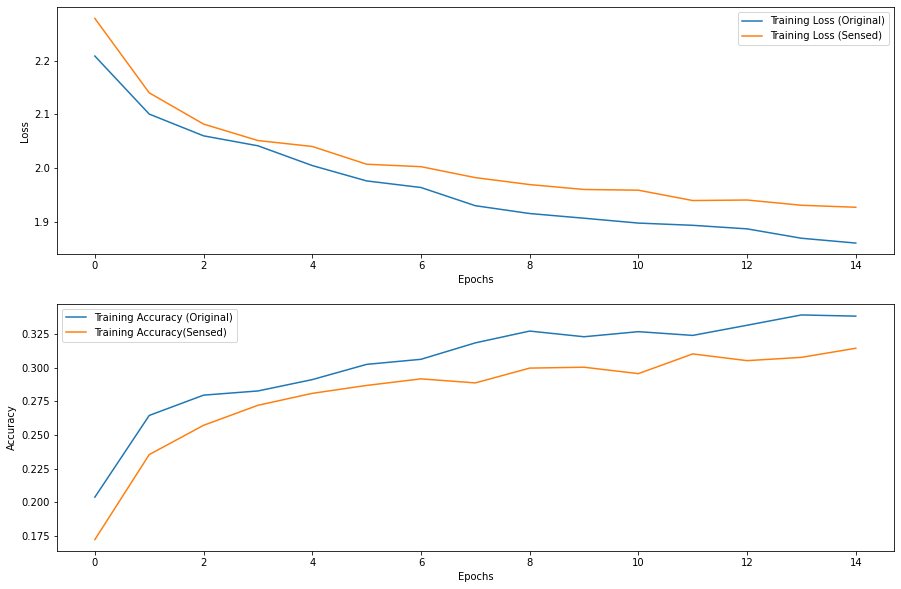

In [71]:
# Plotting the training loss and accuracy for the compressed and original data
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(history_original.history['loss'], label = "Training Loss (Original)")
plt.plot(history_sensed.history['loss'], label = "Training Loss (Sensed)")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(2,1,2)
plt.plot(history_original.history['accuracy'], label = "Training Accuracy (Original)")
plt.plot(history_sensed.history['accuracy'], label = "Training Accuracy(Sensed)")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

## b) Sensing Matrix : Delsarte - Geothal Frames

In [72]:
# Getting a Delsarte Goethal matrix of order 5
sensing_matrix = DGMatrix(5)

### Getting compressive measurements

In [73]:
# Getting the compressive measurements using the DG sensing matrix
c_data = list(map(lambda x: sensing_matrix @ np.reshape(dct2(x),(32*32,1)), data))

In [74]:
# Dividing the compressed and original measurments into test and training dataset
cx_train,cy_train = c_data[0:9000],labels[0:9000]
cx_test,cy_test = c_data[9000:],labels[9000:]
ox_train, oy_train = data[0:9000],labels[0:9000]
ox_test, oy_test = data[9000:], labels[9000:]

### SVM Classification

In [75]:
# SVM classifier for the compressed data
from sklearn import svm
classifier_coded = svm.SVC()
classifier_coded.fit(np.reshape(cx_train,(9000, 32)),cy_train)

SVC()

In [76]:
# SVM classifier for the original data
classifier_data = svm.SVC()
classifier_data.fit(np.reshape(ox_train,(9000,32*32)),oy_train)

SVC()

In [77]:
# SVM accuracy on the compressed and original data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_coded = classifier_coded.predict(np.reshape(cx_test, (1000, 32)))
y_pred_original = classifier_data.predict(np.reshape(ox_test, (1000, 32*32)))

print("Accuracy on sensed data: ",accuracy_score(cy_test, y_pred_coded))
print("Accuracy on actual data: ",accuracy_score(oy_test, y_pred_original))

Accuracy on sensed data:  0.314
Accuracy on actual data:  0.389


###  ANN Classification

In [78]:
import tensorflow as tf

tf.keras.backend.clear_session()

#### Classification on Original Data 

Done in the Bernoulli matrix section, we'll reuse the results from there

#### Classification on Sensed Data

In [79]:
# Model architecure
tf.keras.backend.clear_session()

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(64,activation='relu',input_shape = (32,)))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(64,activation='relu'))
ann_model.add(tf.keras.layers.BatchNormalization())
ann_model.add(tf.keras.layers.Dropout(0.2))
ann_model.add(tf.keras.layers.Dense(32,activation='relu'))
ann_model.add(tf.keras.layers.Flatten())
ann_model.add(tf.keras.layers.Dense(10, activation = 'relu'))


In [80]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

ann_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
# Training epochs
epochs = 15
history_sensed = ann_model.fit(
  np.array(cx_train),np.array(cy_train),
  epochs=epochs,
  callbacks = callback
)

Epoch 1/15
282/282 [==============================] - 2s 3ms/step - loss: 2.2556 - accuracy: 0.1901
Epoch 2/15
282/282 [==============================] - 1s 3ms/step - loss: 2.1464 - accuracy: 0.2270
Epoch 3/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0942 - accuracy: 0.2528
Epoch 4/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0623 - accuracy: 0.2606
Epoch 5/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0437 - accuracy: 0.2687
Epoch 6/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0268 - accuracy: 0.2790
Epoch 7/15
282/282 [==============================] - 1s 3ms/step - loss: 2.0059 - accuracy: 0.2897
Epoch 8/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9955 - accuracy: 0.2876
Epoch 9/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9821 - accuracy: 0.2890
Epoch 10/15
282/282 [==============================] - 1s 3ms/step - loss: 1.9718 - accuracy: 0.2900

In [82]:
# Evaluating the model on the test dataset
ann_model.evaluate(np.array(np.reshape(cx_test, (1000, 32))), np.array(cy_test))

32/32 [==============================] - 0s 1ms/step - loss: 2.0397 - accuracy: 0.3100


[2.039745807647705, 0.3100000023841858]

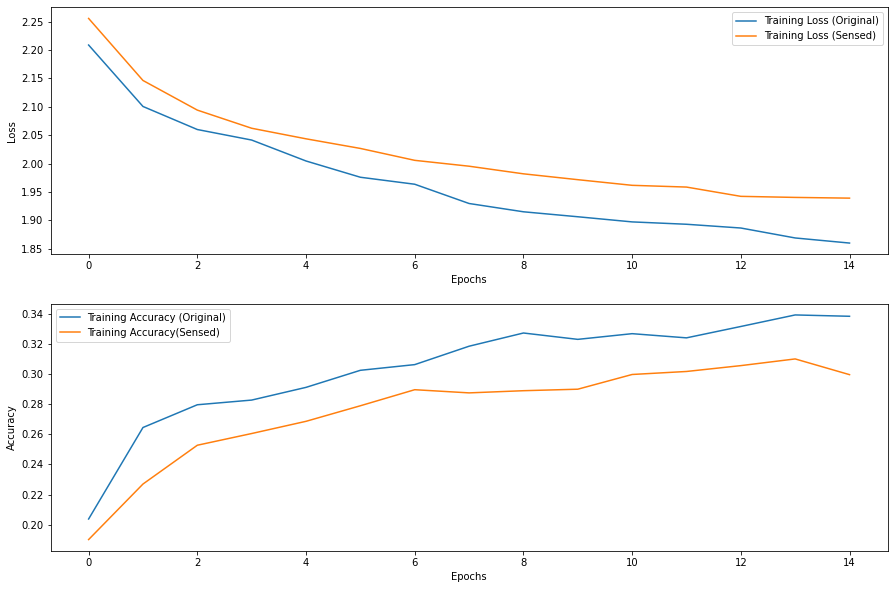

In [83]:
# PLotting the training accuracy and loss of ANN on the compressed and the original data
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(history_original.history['loss'], label = "Training Loss (Original)")
plt.plot(history_sensed.history['loss'], label = "Training Loss (Sensed)")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(2,1,2)
plt.plot(history_original.history['accuracy'], label = "Training Accuracy (Original)")
plt.plot(history_sensed.history['accuracy'], label = "Training Accuracy(Sensed)")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()